![alt text](https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true")  

|fecha|Email|
|-----|-----|
|20 de mayo 2020|luishernandezmatos@yahoo.com|

#  Análisis y Pronosticos de cripto moneda con fbprophet   

**Descripción:**   
 Análisis de las diferentes cryptomoneda Bitcoin y sus predcciones

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load Datasets

In [6]:
# con googe colab
#from google.colab import files
#uploaded = files.upload()

In [7]:
btc = pd.read_csv('BTC_USD_2019-05-14_2020-05-13-CoinDesk.csv')
ltc = pd.read_csv('LTC_USD_2019-05-14_2020-05-13-CoinDesk.csv')
eth = pd.read_csv('ETH_USD_2019-05-14_2020-05-13-CoinDesk.csv')

In [8]:
print('Bitcoin')
btc.head(2)

Bitcoin


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-05-14,7928.417416,7906.946425,8353.869652,7642.403561
1,BTC,2019-05-15,8177.453519,7989.127708,8260.953110,7844.980238


In [9]:
print('Litecoin')
ltc.head(2)

Litecoin


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2019-05-14,90.170627,88.718978,94.388004,86.851903
1,LTC,2019-05-15,102.921952,91.579530,104.498293,90.922794


In [10]:
print('ETH')
eth.head(2)

ETH


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2019-05-14,217.078132,197.299575,217.188013,193.310001
1,ETH,2019-05-15,246.826423,218.442133,247.095786,218.268092


### Visualización

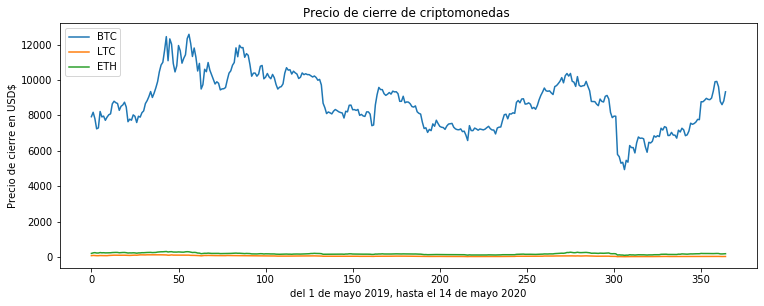

In [11]:
plt.figure(figsize=(12.5,4.5))
plt.plot(btc['Closing Price (USD)'], label= 'BTC')
plt.plot(ltc['Closing Price (USD)'], label='LTC')
plt.plot(eth['Closing Price (USD)'], label='ETH')
plt.title("Precio de cierre de criptomonedas ")
plt.xlabel('del 1 de mayo 2019, hasta el 14 de mayo 2020')
plt.ylabel('Precio de cierre en USD$')
plt.legend(loc='upper left')
plt.show()

**<font color = red> El precio de las acciones del ETH y del LTC no tienen las mismas escalas de valores ya que el Bitcoin tiene un valor de cierre mayor lo podemos notar en la siguiete estadística basica"**

# Transformar los datos  
1. [x] seleccionar y renombrar las columnas de cada datasets  
  +  [x] Closing Price (USD)	to BTC.
  + [x] Closing Price (USD)	to LTC.
  + [x] Closing Price (USD)	to LTC.
1. [x] Unir los tres archivos
1. [x] Estandarizar los datos MinMAxScaler
  + [x] Convertir los datos en DataFrame
1. [x] Visualizar los datos escaldados o normalizados

In [12]:
# seleccionar y renombrar las columnas BTC

btc = btc[['Closing Price (USD)']]
btc.columns = ['BTC']
btc.head()

,BTC
0,7928.417416
1,8177.453519
2,7820.076243
3,7243.650539
4,7295.649729


In [13]:
# seleccionar y renombrar las columnas LTC

ltc = ltc[['Closing Price (USD)']]
ltc.columns = ['LTC']
ltc.head()

,LTC
0,90.170627
1,102.921952
2,95.224878
3,88.054669
4,87.990926


In [14]:
# seleccionar y renombrar las columnas ETH

eth= eth[['Closing Price (USD)']]
eth.columns = ['ETH']
eth.head()

,ETH
0,217.078132
1,246.826423
2,260.330209
3,239.449265
4,238.931991


In [15]:
# unir los archivos
df = pd.concat([btc, ltc, eth], axis = 'columns')
df.head()

,BTC,LTC,ETH
0,7928.417416,90.170627,217.078132
1,8177.453519,102.921952,246.826423
2,7820.076243,95.224878,260.330209
3,7243.650539,88.054669,239.449265
4,7295.649729,87.990926,238.931991


In [16]:
df.describe()

,BTC,LTC,ETH
count,365.000000,365.000000,365.000000
mean,8759.870914,68.389267,196.172798
std,1481.575891,26.898427,47.558593
min,4944.702336,32.053195,107.898345
25%,7550.239200,46.605055,163.937208
50%,8688.973526,60.036679,186.123827
75%,9897.429352,83.644499,224.238760
max,12575.904067,139.383189,324.130855


In [17]:
#Estandarización de los datos

from sklearn.preprocessing import  MinMaxScaler
minmax = MinMaxScaler(feature_range = (0, 100))
scaled = minmax.fit_transform(df)

In [18]:
#convertirlo en un df
df_scaled = pd.DataFrame(scaled, columns = df.columns)
df_scaled.head(2)

,BTC,LTC,ETH
0,39.098889,54.148361,50.491847
1,42.362282,66.028847,64.249394


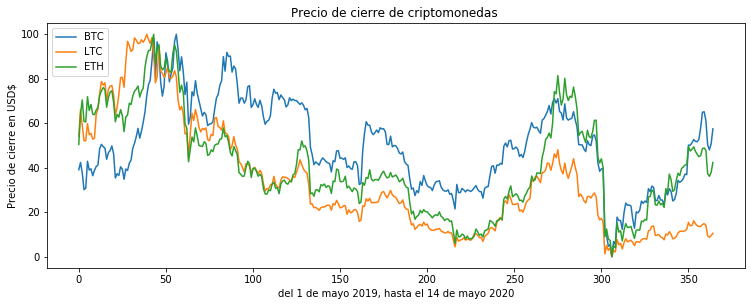

In [19]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df_scaled.BTC, label= 'BTC')
plt.plot(df_scaled.LTC, label='LTC')
plt.plot(df_scaled.ETH, label='ETH')
plt.title("Precio de cierre de criptomonedas ")
plt.xlabel('del 1 de mayo 2019, hasta el 14 de mayo 2020')
plt.ylabel('Precio de cierre en USD$')
plt.legend(loc='upper left')
plt.show()

### Verificar:
1. [x] volatividad
1. [x] promedio
1. [x] correlación
1.  [x] Visualizar la correlación

In [20]:
#volatividad
df_scaled.std()

BTC    19.414713
LTC    25.061426
ETH    21.994192
dtype: float64

In [21]:
# Promedio diario
df_scaled.mean()

BTC    49.994335
LTC    33.854537
ETH    40.823858
dtype: float64

In [22]:
#correlación 
df_scaled.corr()

,BTC,LTC,ETH
BTC,1.000000,0.639697,0.678207
LTC,0.639697,1.000000,0.869311
ETH,0.678207,0.869311,1.000000


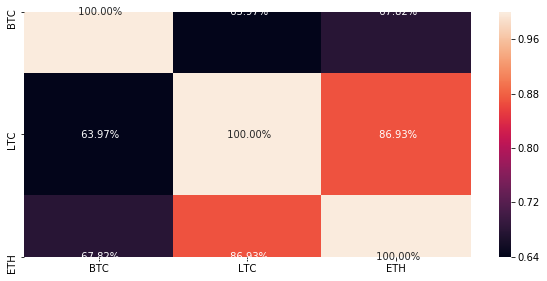

In [23]:
plt.figure(figsize=(10, 4.5))
sns.heatmap(df_scaled.corr(), annot=True, fmt=' .2%')
plt.show()

### Crear variables (ds, y)

In [24]:
# Craer columns ds

rng= pd.date_range(start='2019-05-15', end='2020-05-13', freq='D')
df['ds'] = rng
df.head(2)

,BTC,LTC,ETH,ds
0,7928.417416,90.170627,217.078132,2019-05-15
1,8177.453519,102.921952,246.826423,2019-05-16


In [25]:
df.shape

(365, 4)

In [26]:
#seleccionar conjunto los datos de entrenamiento para BTC-LTC, ETH
btc_train = df[['BTC', 'ds']]
ltc_train = df[['LTC', 'ds']]
eth_train = df[['ETH', 'ds']]

In [27]:
#Renombrar columnas
btc_train.columns= ['y', 'ds']
ltc_train.columns = ['y', 'ds']

eth_train.columns = ['y', 'ds']

In [28]:
#revertir el orden de las columnas
btc_train = btc_train.loc[:, ::-1]
ltc_train = ltc_train.loc[:, :: -1]
eth_train = eth_train.loc[:, :: -1]

### Pronosticar con el Modelo fbprophet

In [29]:
import fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [30]:
m = Prophet()

In [31]:
m.fit(btc_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [32]:
#pronostico de 100 days
future_dates = m.make_future_dataframe(periods=100)
future_dates.shape

(465, 1)

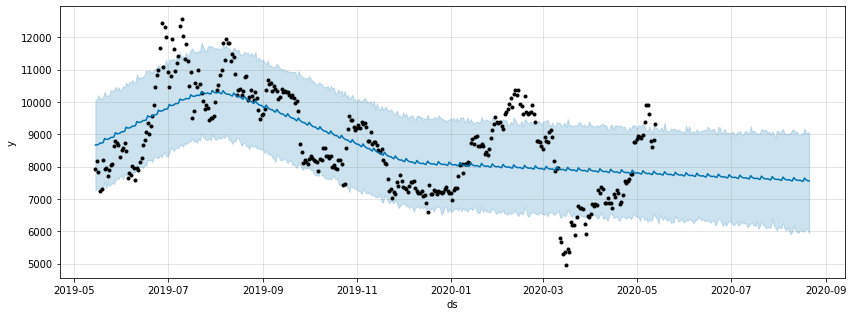

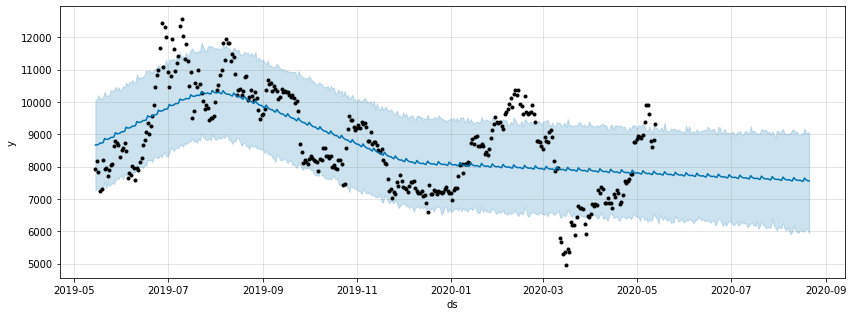

In [33]:
predicted = m.predict(future_dates)
m.plot(predicted, figsize=(12,4.5))

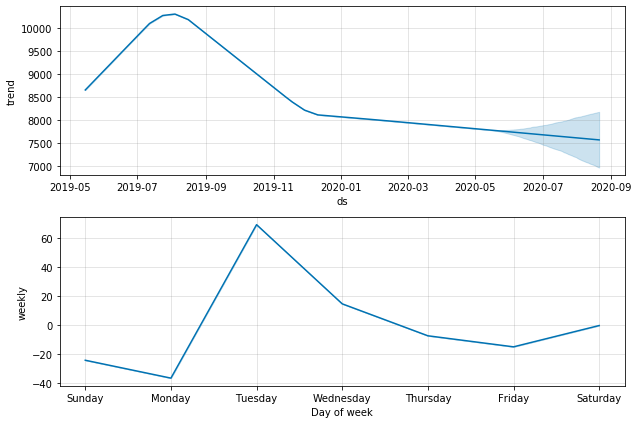

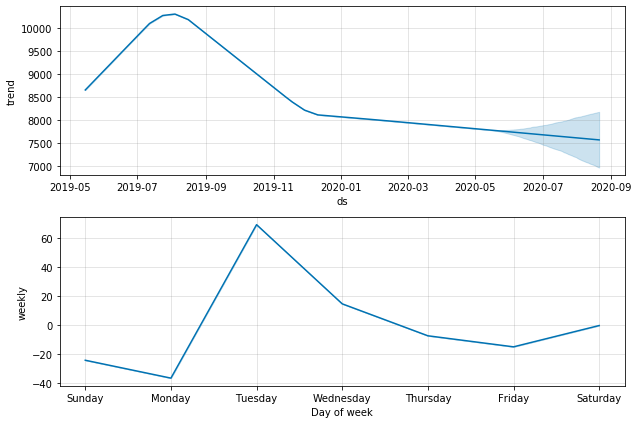

In [34]:
m.plot_components(predicted)

In [35]:
resultados = predicted.set_index('ds')
resultados.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2020-08-17,7581.182938,5983.473146,9028.722997,7020.388132,8159.035555,-36.559891,-36.559891,-36.559891,-36.559891,-36.559891,-36.559891,0.0,0.0,0.0,7544.623047
2020-08-18,7579.018689,6020.709307,9183.068559,7007.144209,8163.795927,69.051956,69.051956,69.051956,69.051956,69.051956,69.051956,0.0,0.0,0.0,7648.070645
2020-08-19,7576.854441,6100.929942,9035.060914,6993.420912,8170.641489,14.570621,14.570621,14.570621,14.570621,14.570621,14.570621,0.0,0.0,0.0,7591.425062
2020-08-20,7574.690192,6047.033754,9057.352594,6982.840567,8175.314560,-7.417993,-7.417993,-7.417993,-7.417993,-7.417993,-7.417993,0.0,0.0,0.0,7567.272199
2020-08-21,7572.525943,5938.204233,9060.045698,6973.095620,8181.666996,-15.027397,-15.027397,-15.027397,-15.027397,-15.027397,-15.027397,0.0,0.0,0.0,7557.498546


In [36]:
results = resultados.loc['2020-05-16': '2020-08-21']

In [37]:
results.yhat.describe()

count      98.000000
mean     7677.491999
std        69.272343
min      7544.623047
25%      7620.709946
50%      7678.533296
75%      7727.434523
max      7845.017266
Name: yhat, dtype: float64

# Resultado del  Pronóstico Bitcoin  
El precio de está criptomoneda tendra una tendencia a la baja para los proxímos 100 días, podemos ver en este período de predicción su  precio maxímo será de **7, 848.88 Dolares**, su precio mínimo de **7,558.22 Dolares**. el precio promedio es de **7,686.55**

# Predecir el precio del Litecoin (LTC)-para los próximos 100 días

In [38]:
model_ltc = Prophet()
model_ltc.fit(ltc_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future_dates_ltc = model_ltc.make_future_dataframe(periods=100, freq='D')

In [40]:
future_dates.shape

(465, 1)

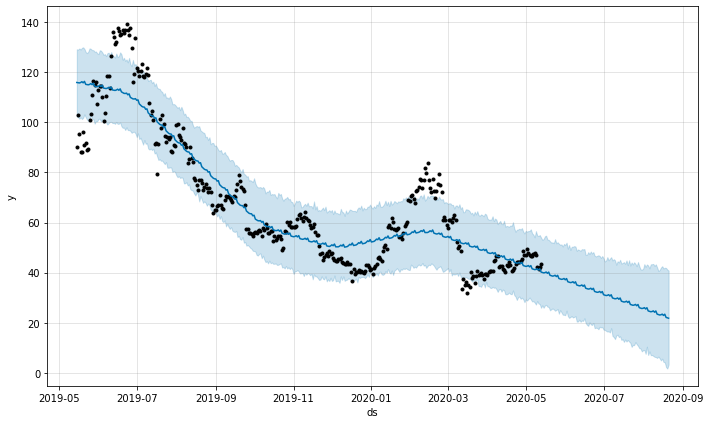

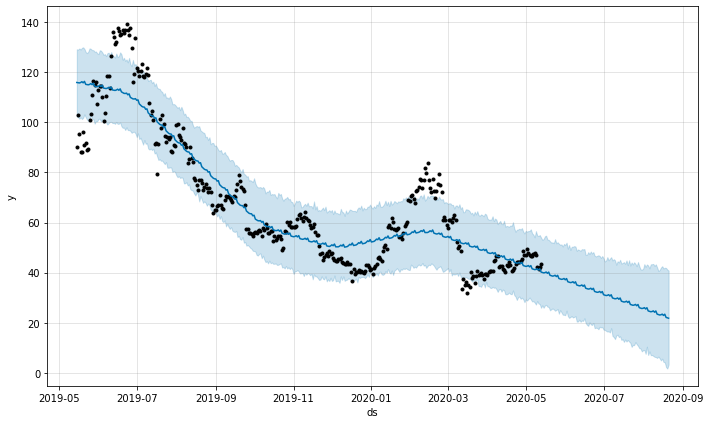

In [41]:
predict_ltc = model_ltc.predict(future_dates_ltc)
model_ltc.plot(predict_ltc)

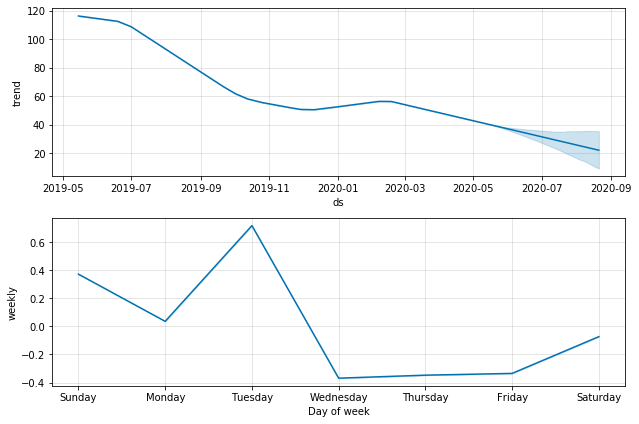

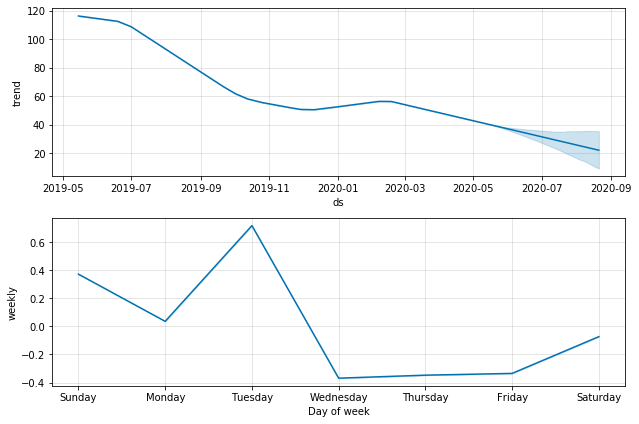

In [42]:
model_ltc.plot_components(predict_ltc)

In [43]:
resultado_ltc = predict_ltc.loc['2020-05-15': ]
resultado_ltc.yhat.describe()

count    262.000000
mean      43.384262
std       10.675418
min       21.806522
25%       33.976715
50%       46.417856
75%       52.843696
max       57.092617
Name: yhat, dtype: float64

# Resultado de la predicción para el Litecoin  
El precio de está criptomoneda tendra una tendencia a la baja para los proxímos 100 días, podemos ver en este período de predicción su maxímo precio será de **56.81**, comprado con su precio máximo original estaría de 139.38, estaría en un **-82.59** dolares menos, esto representa que alcanzaria un precio maxímo de un **59% menos**.

# Proyección del Ethereum (ETH

In [44]:
model_eth = Prophet()
model_eth.fit(eth_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
futuredays_eth = model_eth.make_future_dataframe(periods=100, freq='D', include_history=True)

In [46]:
prediccion = model_eth.predict(futuredays_eth)

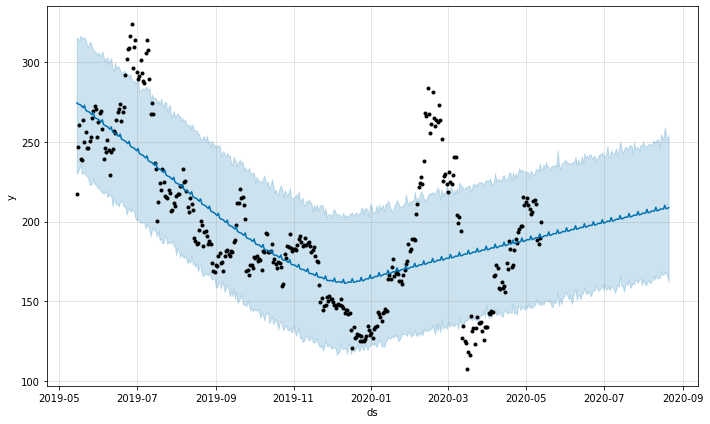

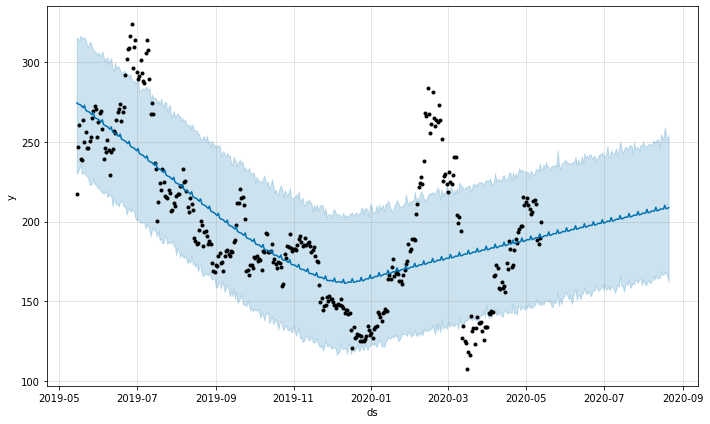

In [47]:
model_eth.plot(prediccion)

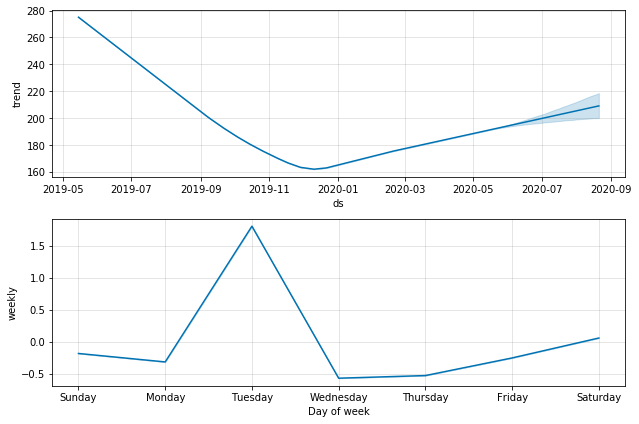

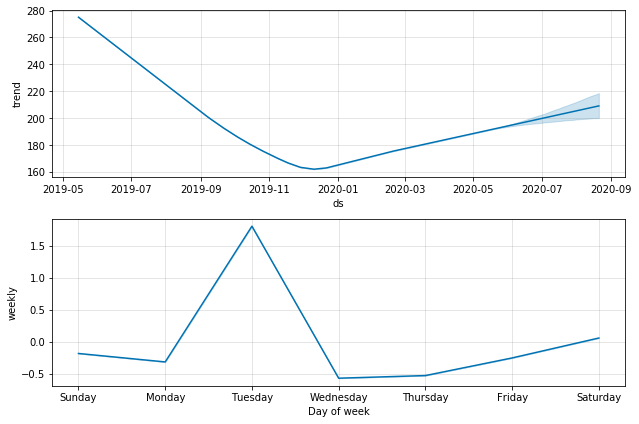

In [48]:
model_eth.plot_components(prediccion)

In [49]:
prediccion.loc['2020-05-15': ].yhat.describe()

count    262.000000
mean     184.855346
std       14.184024
min      161.330299
25%      172.998900
50%      184.892328
75%      197.073305
max      210.258179
Name: yhat, dtype: float64

# Resultados ETH  
Para el mes de julio comenzara el  aumento de su precio donde podrá alcanzar un precio máximo de **$210.99 Dolares**, el precio mínimo que alcanzara dentro de los próximos 100 días será de **160.98** Dolares